Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some
algorithms that are not affected by missing values.

Ans - Missing values in a dataset : In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

Histogram based Gradient-boosting classifier/Regressor are not affected by missing value

Q2: List down techniques used to handle missing data. Give an example of each with python code.

Ans- Mean-value Imputation : In Normal Distribution we replace NAN value to mean

Median-Value-Imputation : If you have outlier in data then replace with median

Mode-Value-Computation : If data is categorical then replace missing data with mode


In [12]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


c:\Users\dhanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

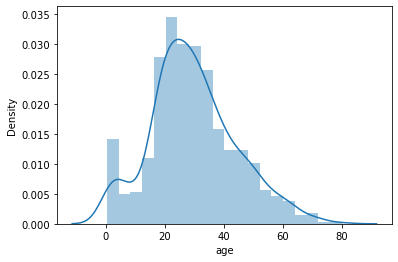

In [15]:
sns.distplot(df['age'])

In [16]:
df['new_age'] = df['age'].fillna(df['age'].mean())

In [19]:
df[['new_age', 'age']]

,new_age,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


Median

In [20]:
df['median_age'] = df['age'].fillna(df['age'].median())

In [21]:
df[['median_age', 'new_age', 'age']]

,median_age,new_age,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


Mode

In [34]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,median_age,new_embarked
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,NaN


In [35]:
df['new_embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [24]:
df[['new_embarked']]

,new_embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [36]:
df['new_embarked'].isnull().sum()

0

Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

Ans- Imbalanced data : A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

This imbalance can lead to inaccurate results

Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-
sampling are required.

Ans- Upsampling : Upsampling is a procedure where synthetically generated data points (corresponding to minority class) are injected into the dataset. After this process, the counts of both labels are almost the same. This equalization procedure prevents the model from inclining towards the majority class.

Downsampling : Downsampling (in this context) means training on a disproportionately low subset of the majority class examples. Upweighting means adding an example weight to the downsampled class equal to the factor by which you downsampled.

Q5: What is data Augmentation? Explain SMOTE.

Ans-  Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.

SMOTE: Smote involves generating synthetic intences of the minority class by interpolating between existing intances.

Q6: What are outliers in a dataset? Why is it essential to handle outliers?

Ans- In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.

Outliers can occur because of the always present possibility of very high or low dietary intakes, but may also indicate errors in reporting, coding, or the underlying databases used to estimate intakes. Outliers are important because they can have a large influence on statistics derived from the dataset




Q7: You are working on a project that requires analyzing customer data. However, you notice that some of
the data is missing. What are some techniques you can use to handle the missing data in your analysis?

Ans- df.isnull().sum() 

df means dataframe

Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are
some strategies you can use to determine if the missing data is missing at random or if there is a pattern
to the missing data?

Ans- Missing data replace with median of dataset.

Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the
dataset do not have the condition of interest, while a small percentage do. What are some strategies you
can use to evaluate the performance of your machine learning model on this imbalanced dataset?

Ans- minority of patients are interested So, we are using SMOTE to increase the dataset of minority of patients are interested

Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is
unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to
balance the dataset and down-sample the majority class?

Ans- In this situation we can use downsampling the dataset

Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a
project that requires you to estimate the occurrence of a rare event. What methods can you employ to
balance the dataset and up-sample the minority class?

Ans- In this situation we use SMOTE(synthetic Minority Oversampling Technique)